In [82]:
# imports
from astropy.io import fits
from scipy import interpolate as sin
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotting as myP
import numpy as np
import csv 
import match
import SED

In [83]:
# path variables 
path_cat = 'D:\IfA REU\Catalogs'
path_fig = 'D:\IfA REU\IfA-REU-Project\Figures'
path_csv = 'D:\IfA REU\IfA-REU-Project\Lists'

# Read Data

In [84]:
def PrintNumber(myList) : 
    # make list of AGN names for printting info 
    agnTypeNames = ['Red:\t', 'Yel:\t', 'Blu:\t', 'Byi:\t', 'Bni:\t', 'r24:\t', 'y24:\t', 'r24:\t']
    # print name and number of items in list 
    for name, row in zip(agnTypeNames, myList) : 
        print(name, row.shape)

In [85]:
# read AGN IDs
agnIDs = myP.ReadFile(path_csv+'\ID_RedYelBlu_AGNselection.csv')

# convert agnIDs into list of integer numpy arrays 
agnIDs_npArray = []
for row in agnIDs : 
    agnIDs_npArray.append(np.array(row, dtype=int))

Cropped:  ['Row 1 = red IR selected AGN. Row 2 = yellow both IR-Xray AGN. Row 3 = blue X-ray selected AGN. Row 4 = blue X-ray selected AGN with IRAC detections. Row 5 = blue X-ray selected AGN without IRAC detections. Row 6 = red IR selected AGN with 24um detection. Row 7 = yellow both IR-Xray AGN with 24um detection. Row 8 = blue X-ray selected AGN with 24um and IRAC detections. Values are ID_COSMOS2015.']


In [86]:
# constants for AGN type index

RED = 0     # red       IR selected AGN
YEL = 1     # yellow    both IR-Xray AGN
BLU = 2     # blue      X-ray selected AGN

BYI = 3     # blue      X-ray selected AGN  with IRAC detections
BNI = 4     # blue      X-ray selected AGN  without IRAC detections

R24 = 5     # red       IR selected AGN     with 24um detection
Y24 = 6     # yellow    both IR-Xray AGN    with 24um detection
B24 = 7     # blue      X-ray selected AGN  with 24um and IRAC detections

In [87]:
# setup corresponding color
agn_colors = [myP.c_ir, myP.c_ir_xray, myP.c_xray, myP.c_xray, myP.c_xray, myP.c_ir, myP.c_ir_xray, myP.c_xray]

In [88]:
# read redshifts
zAll = np.array(myP.ReadFile(path_cat+'\COSMOS_z_matches.csv'))
zID, zZ = zAll.T
# get correct data type
zID = np.array(zID, dtype=int)
zZ  = np.array(zZ,  dtype=float)
# apply mask to remove bad redshifts
mask_z = (zZ >= 0) & (zZ < 99)
zID = zID[mask_z]
zZ  = zZ[mask_z]
# print info
print('Number of sources w/ z:', len(zID))

Cropped:  ['ID', 'z']
Number of sources w/ z: 485793


In [89]:
agn_z = []
agn_ID_wZ = []

for row in agnIDs_npArray : 
    # match redshift against AGN IDs
    key_z_agn, key_agn_z = match.match(zID, row)
    # get redshift array for AGN
    agn_z.append(zZ[key_z_agn])
    # get AGN ID arrays w/ redshifts
    agn_ID_wZ.append(row[key_agn_z])

PrintNumber(agn_z)

Red:	 (547,)
Yel:	 (609,)
Blu:	 (1567,)
Byi:	 (1416,)
Bni:	 (151,)
r24:	 (399,)
y24:	 (501,)
r24:	 (1016,)


# Redshift Histograms (DATA)

In [90]:
def MeanLineForHist(x,c='k',xtext=0.998, ytext=0.94, horizAlign='right') :
    mean = np.array(x).mean()
    min_ylim, max_ylim = plt.ylim()
    plt.axvline(mean, color=c, linestyle='dashed', linewidth=2)
    plt.text(mean*xtext, max_ylim*ytext, 'Mean: {:.1f}'.format(mean), c=c, horizontalalignment=horizAlign)

In [91]:
def RedshiftHist_one(
    x,
    saveStr=''
):
    # set style
    myP.SetStyle()

    # plot
    plt.hist(x, bins=np.arange(0,7,0.25), color='gray')

    # set height to +10% max value
    min_ylim, max_ylim = plt.ylim()
    plt.ylim(ymin=0, ymax=max_ylim+0.1*max_ylim)

    # plot mean line
    MeanLineForHist(x,xtext=0.97)

    # set axis lables
    plt.xlabel('z')
    plt.ylabel('Number')

    # save
    if(saveStr) :
        myP.save(saveStr)

    # finish plot
    plt.show()

    # output data
    print('Number of soruces:\t', len(x))

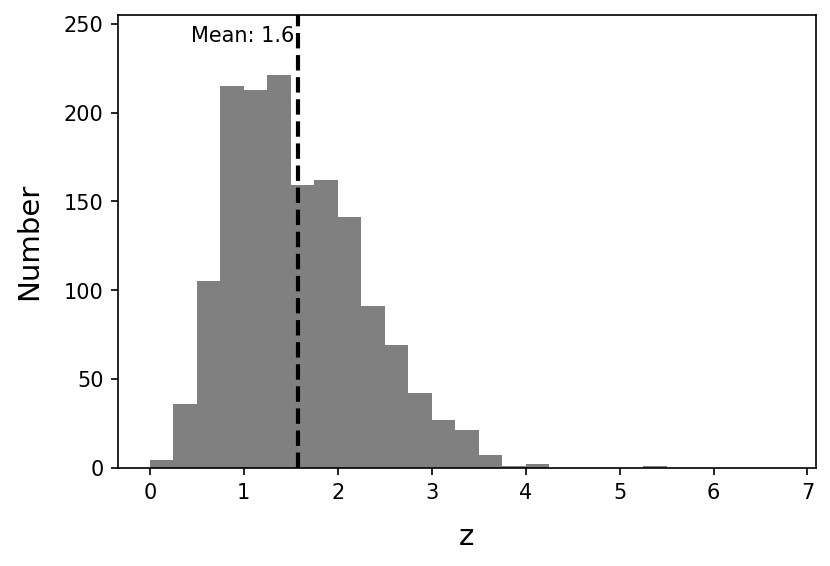

Number of soruces:	 1517


In [92]:
# X-ray selected AGN 
z_Xray = np.concatenate((agn_z[B24], agn_z[Y24]))
RedshiftHist_one(z_Xray, saveStr=path_fig+'\COSMOS_z_XraySelected.png')

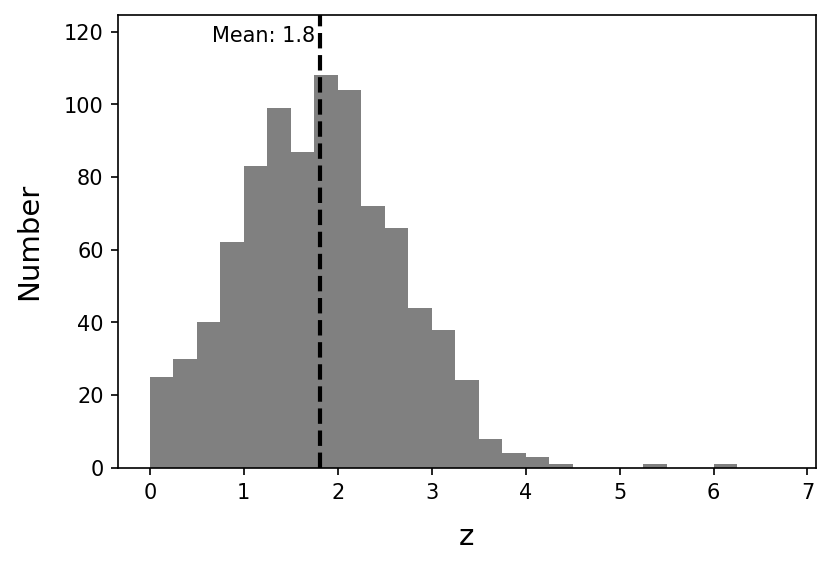

Number of soruces:	 900


In [93]:
# MIR selected AGN 
z_MIR = np.concatenate((agn_z[R24], agn_z[Y24]))
RedshiftHist_one(z_MIR, saveStr=path_fig+'\COSMOS_z_MIRselected.png')

# Redshift Histograms (RESULTS)

In [102]:
def RedshiftHist_tri(
    x1, c1,
    x2, c2, 
    x3, c3,
    showSum=True,
    saveStr=''
):
     # set style
    myP.SetStyle()

    if(showSum):
        x0 = np.concatenate((x1,x2,x3))
        plt.hist(x0, bins=np.arange(0,7,0.25), histtype='bar',  color='lightgray', linewidth=2)

    # plot histogram
    plt.hist(x3, bins=np.arange(0,7,0.25), histtype='step', edgecolor=c3, linewidth=2)
    plt.hist(x2, bins=np.arange(0,7,0.25), histtype='step', edgecolor=c2, linewidth=2)
    plt.hist(x1, bins=np.arange(0,7,0.25), histtype='step', edgecolor=c1, linewidth=2)

    # set height to  +20% max value
    min_ylim, max_ylim = plt.ylim()
    plt.ylim(ymin=0, ymax=max_ylim+0.20*max_ylim)

    # mean line
    MeanLineForHist(x1,c=c1,ytext=0.94)
    MeanLineForHist(x2,c=c2,ytext=0.89)
    MeanLineForHist(x3,c=c3,ytext=0.84)

    # set axis lables
    plt.xlabel('z')
    plt.ylabel('Number')

    # save
    if(saveStr) :
        myP.save(saveStr)

    # finish plot
    plt.show()

    # output data
    print('Number of soruces (x1):\t', len(x1))
    print('Number of soruces (x2):\t', len(x2))
    print('Number of soruces (x3):\t', len(x3))

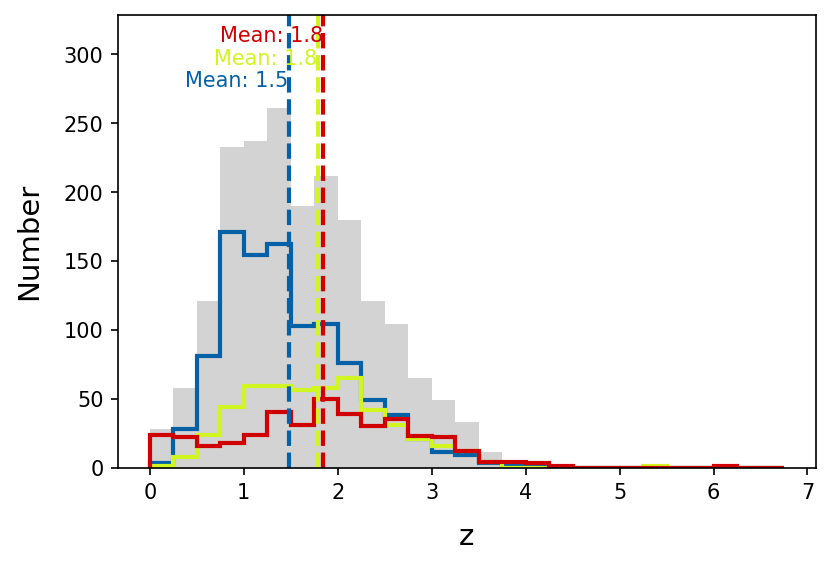

Number of soruces (x1):	 399
Number of soruces (x2):	 501
Number of soruces (x3):	 1016


In [103]:
RedshiftHist_tri(
    agn_z[R24], agn_colors[R24],
    agn_z[Y24], agn_colors[Y24], 
    agn_z[B24], agn_colors[B24],
    showSum=True,
    saveStr=path_fig+'\COSMOS_z_tricolor.png'
)